# Exemplar: Perform logistic regression 

## Introduction

In this activity, you will complete an effective bionomial logistic regression. This exercise will help you better understand the value of using logistic regression to make predictions for a dependent variable based on one independent variable and help you build confidence in practicing logistic regression. Because logistic regression is leveraged across a wide array of industries, becoming proficient in this process will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Your goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [7]:
from google.cloud import storage

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sns
from scipy import stats
from io import StringIO

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:
#storage_client =  storage.Client.from_service_account_json('../heidless-jupyter-0-d2008100d98c.json')
storage_client =  storage.Client()

BUCKET_NAME = 'heidless-jupyter-bucket-0'

bucket = storage_client.get_bucket(BUCKET_NAME)

AllCSV = []
my_prefix = 'airline/'
my_file = 'Invistico_Airline.csv'
full_file = my_prefix + my_file
#print(f'full_file: {full_file}')

file_names = list(bucket.list_blobs(prefix=my_prefix))
for file in file_names:
    if(file.name != my_prefix):
        if file.name == full_file:
            AllCSV.append(file.name)
#            print(file.name)
AllCSV


['airline/Invistico_Airline.csv']

In [9]:
### YOUR CODE HERE ###

# Standard operational package imports.

# Important imports for preprocessing, modeling, and evaluation.

# Visualization package imports.

# Import libraries and packages.

### YOUR CODE HERE ### 
# Import libraries and modules.

### YOUR CODE HERE ### 
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
#companies = pd.read_csv("Unicorn_Companies.csv")

# Display the first 10 rows of the data
all_dataframes = []

for csv in AllCSV:
    blob = bucket.get_blob(csv)
    if blob is not None and blob.exists(storage_client):
        bt = blob.download_as_string()
        s = str(bt, 'ISO-8859-1')
        s = StringIO(s)
        df = pd.read_csv(s, encoding='ISO-8859-1', low_memory=False)

        #df['country'] = csv[0:2] # adding column 'country' so that each dataset could be identified uniquely
        all_dataframes.append(df)
        print(csv)
    
#all_dataframes[0].head() # index 0 to 9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets

df_original = all_dataframes[0]
df_original.head()


airline/Invistico_Airline.csv


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Load the dataset

Load the **Invistico_Airline.csv** dataset. Save the resulting pandas DataFrame in a variable named `df_original`. 

In [10]:
### YOUR CODE HERE ###

#df_original = pd.read_csv("Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the filename as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows

Output the first 10 rows of data.

In [11]:
### YOUR CODE HERE ###

df_original.head(n = 10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [12]:
### YOUR CODE HERE ###

df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [13]:
### YOUR CODE HERE ###

df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` function. To examine how many NaN values there are, set the `dropna` parameter passed in to this function to `False`.

</details>

**Question:** How many satisfied and dissatisfied customers were there?

There were 71,087 satisfied customers and 58,793 dissatisfied customers.

**Question:** What percentage of customers were satisfied?

54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy. 

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [14]:
### YOUR CODE HERE ###

df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. The `Arrival Delay in Minutes` column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

* There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
* This column might impact the relationship between entertainment and satisfaction.

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [24]:
### YOUR CODE HERE ###

df_subset = df_original.dropna(axis=0).reset_index(drop = True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [25]:
### YOUR CODE HERE ###

df_subset = df_subset.astype({"Inflight entertainment": float})

<details>
    
  <summary><h4><strong>Hint 1</strong></h4></summary>
Use the `.astype()` function with the dictionary `{"Inflight entertainment": float}` as an input.

</details>

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [26]:
### YOUR CODE HERE ###

df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `OneHotEncoder()` from `sklearn.preprocessing`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call `OneHotEncoder()`, specifying the `drop` argument as `'first'` in order to remove redundant columns from the output. 

Call `.fit_transform()`, passing in the subset of the data that you want to encode (the subset consisting of `satisfaction`). 

Call `.toarray()` in order to convert the sparse matrix that `.fit_transform()` returns into an array.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Index `df_subset` with a double pair of square brackets to get a DataFrame that consists of just `satisfaction`.

After getting the encoded values, update the `satisfaction` column (you can use reassignment).

</details>

### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [27]:
### YOUR CODE HERE ###

df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are outputted, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.



In [28]:
### YOUR CODE HERE ###

X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If you named your independent variable `X` and your dependent variable `y`, then it would be `train_test_split(X, y, test_size=0.30, random_state=42)`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

When you use `train_test_split`, pass in `42` to `random_state`. `random_state` is used so that if other data professionals run this code, they can get the same exact train test split. If you use a different random state, your results will differ. </details>

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

Other variables, like `Departure Delay in Minutes` seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal. 

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [29]:
### YOUR CODE HERE ###

clf = LogisticRegression().fit(X_train,y_train)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `LogisticRegression()` and the `fit()` function on the training set. `LogisticRegression().fit(X_train,y_train)`.

</details>

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [30]:
### YOUR CODE HERE ###

clf.coef_

array([[0.99751462]])

In [31]:
### YOUR CODE HERE ###

clf.intercept_

array([-3.19355406])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to the content on [obtaining the parameter estimates](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/XCLzq/construct-a-logistic-regression-model-with-python) from a logistic regression model.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Call attributes to obtain the coefficient and intercept estimates.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `.coef_` and `.intercept_`

</details>

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

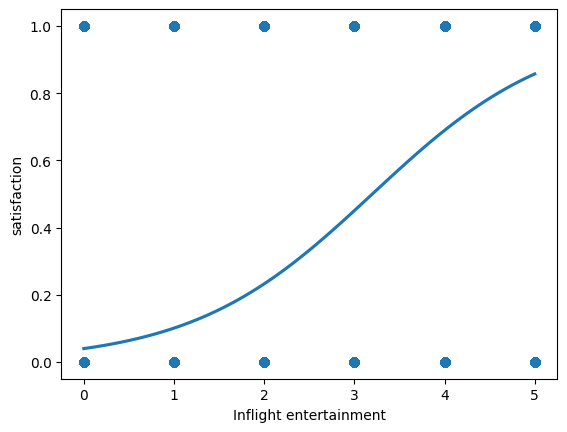

In [32]:
### YOUR CODE HERE ###

sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the seaborn library that can plot data and a logistic regression model fit.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `regplot` function.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Set the `logistic` parameter passed in to this function to `True` to estimate a logistic regression model.

</details>

**Question:** What can you tell from the graph?

The graph seems to indicate that the higher the `inflight entertainment` value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as `Inflight entertainment` is categorical. 

## Step 4: Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [33]:
### YOUR CODE HERE ###

# Save predictions.

y_pred = clf.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [34]:
### YOUR CODE HERE ###
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


### Use the `predict_proba` and `predict` functions on `X_test`

In [35]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Using the `predict_proba` function on `X_test` will produce the probability that each observation is a 0 or 1. 

</details>

In [ ]:
# Use predict to output 0's and 1's.

### YOUR CODE HERE ###

clf.predict(X_test)

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

`clf.predict` outputs an array of 0's and 1's, where 0's are satisfied and 1's are not satisfied. 

</details>

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [ ]:
### YOUR CODE HERE ###

print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score`, and `metrics.f1_score` functions. 
    
</details> 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

In [ ]:
### YOUR CODE HERE ###

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**Question:** What stands out to you about the confusion matrix?

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives. 

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

There isn't a large difference in the number of false positives and false negatives. 

**Question:** What do you think could be done to improve model performance?

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like `Departure Delay in Minutes,` seem like they could potentially influence customer satisfaction.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 